In [ ]:
# @title import library

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import pickle
import time

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


In [ ]:
# @title import drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# @title load dataset
train_dir = "/content/drive/MyDrive/anacondas_pythons"
test_dir = "/content/drive/MyDrive/anacondas_pythons"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 90 images belonging to 2 classes.
Found 90 images belonging to 2 classes.


In [ ]:

print(train_generator.class_indices)

{'train': 0, 'valid': 1}


In [ ]:
# @title Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

# Training model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 26s 6s/step - accuracy: 0.6299 - loss: 3.2680 - val_accuracy: 0.6667 - val_loss: 0.6441
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.5937 - loss: 3.2866 - val_accuracy: 0.3333 - val_loss: 0.7460
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.4667 - loss: 1.7306 - val_accuracy: 0.6667 - val_loss: 0.6740
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.6442 - loss: 1.4244 - val_accuracy: 0.5222 - val_loss: 0.6916
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.6649 - loss: 0.9350 - val_accuracy: 0.3333 - val_loss: 0.7143
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.5122 - loss: 1.0564 - val_accuracy: 0.6778 - val_loss: 0.6846
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.6203 - loss: 1.2355 - val_accuracy: 0.6667 - val_loss: 0.6788
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.7118 - loss: 0.9317 - val_accuracy: 0.3444 - val_loss: 0.6981
Epoch 9/1

In [ ]:
# @title evaluasi model
loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {acc * 100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 453ms/step - accuracy: 0.3268 - loss: 0.6999
Test Accuracy: 33.33%


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

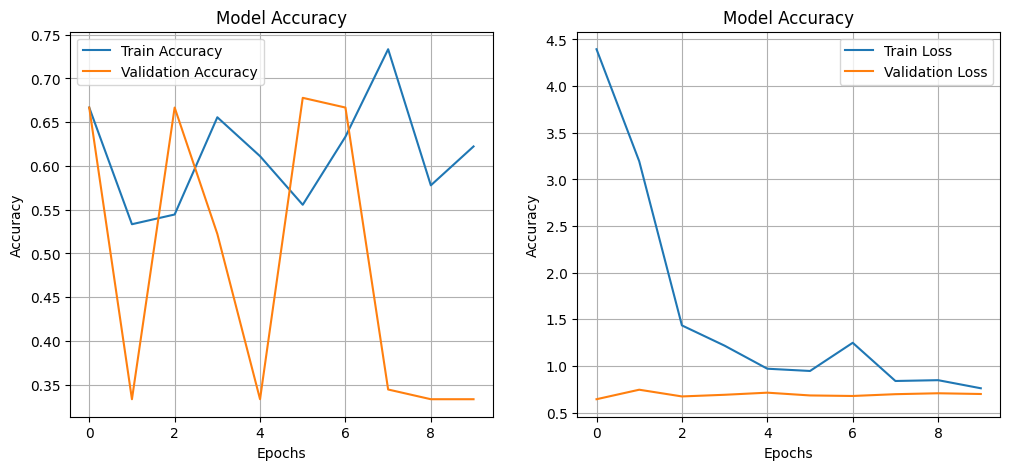

In [ ]:

# @title grafik hasil training
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)
plt

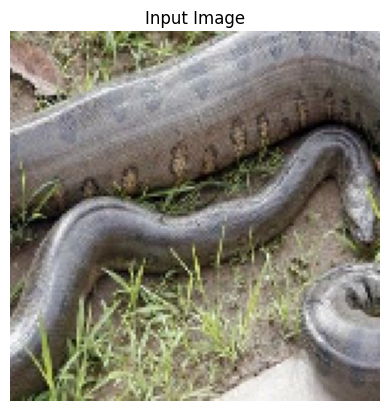

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
Prediction: anacoanda


In [ ]:

img_path = "/content/drive/MyDrive/anacondas_pythons/train/anaconda/anaconda_1.jpg"


img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0


plt.imshow(img)
plt.axis("off")
plt.title("Input Image")
plt.show()

# Prediksi
prediction = model.predict(img_array)
print("Prediction:", "anacoanda" if prediction[0][0] > 0.5 else "python")

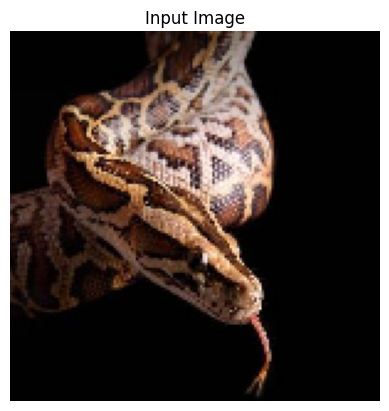

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Prediction: python


In [ ]:


img_path = "/content/drive/MyDrive/anacondas_pythons/train/python/python_10.jpg"

# Preprocessing gambar
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

plt.imshow(img)
plt.axis("off")
plt.title("Input Image")
plt.show()


prediction = model.predict(img_array)
print("Prediction:", "python" if prediction[0][0] > 0.5 else "anaconda")